# COVID 19 Trend Analysis

### SOURCE: Python for Data Science - Course for Beginners (Learn Python, Pandas, NumPy, Matplotlib)  
https://www.youtube.com/watch?v=LHBE6Q9XlzI&t=43727s  
  
### DATA:  
https://cocalc.com/share/public_paths/1d512c20f1854441c6927052348f9614f96ff54d/covid_19_data.csv

In [1]:
#importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
#reading the csv file
df = pd.read_csv('covid_19_data.csv')

In [3]:
#getting all the data
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4242,4243,03/08/2020,Northern Territory,Australia,2020-03-06T04:33:03,0.0,0.0,0.0
4243,4244,03/08/2020,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
4244,4245,03/08/2020,"Montgomery County, TX",US,2020-03-07T19:53:02,0.0,0.0,0.0
4245,4246,03/08/2020,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [4]:
#top 50 data
df.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
#dropping 'SNo' and 'Last Update' columns
df.drop(['SNo', 'Last Update'], axis=1, inplace=True)

#renaming headings
df.rename(columns={'ObservationDate':'Date', 'Province/State':'State', 'Country/Region':'Country'}, inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
#using constant strategy of SimpleImputer from scikit-learn module
imputer = SimpleImputer(strategy='constant')

#impute all data with constant strategy
df2 = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
#grouping all the records of each country
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

In [9]:
#top 20 of df3
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0
5,Afghanistan,2020-02-28,1.0,0.0,0.0
6,Afghanistan,2020-02-29,1.0,0.0,0.0
7,Afghanistan,2020-03-01,1.0,0.0,0.0
8,Afghanistan,2020-03-02,1.0,0.0,0.0
9,Afghanistan,2020-03-03,1.0,0.0,0.0


In [10]:
#getting all unique countries
countries = df3['Country'].unique()
len(countries)

111

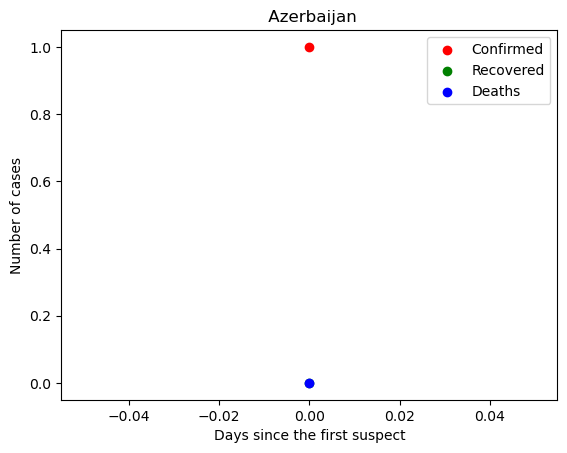

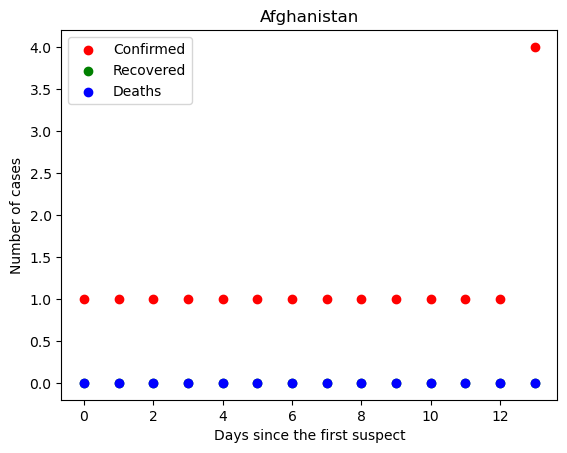

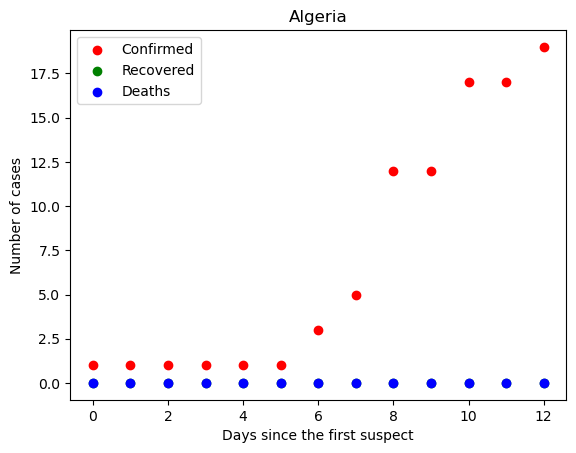

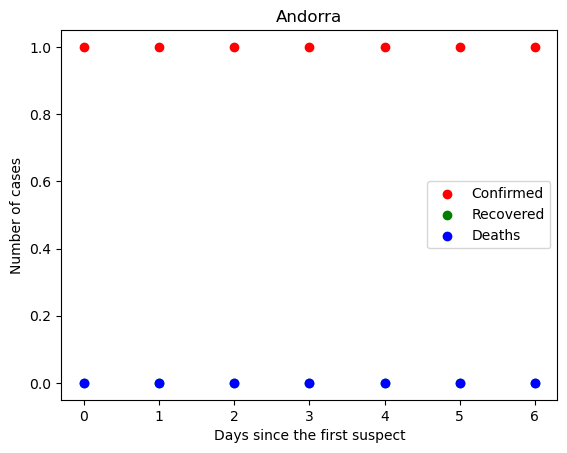

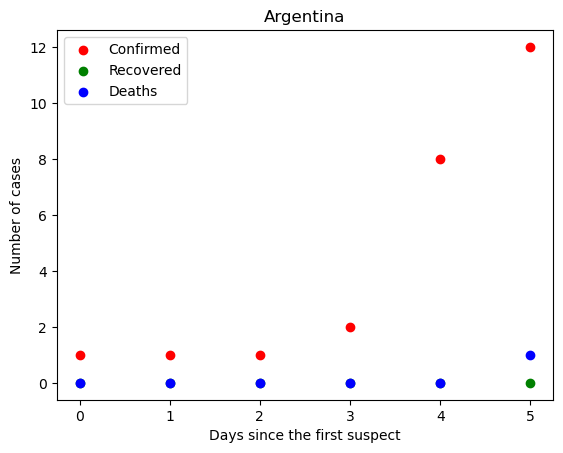

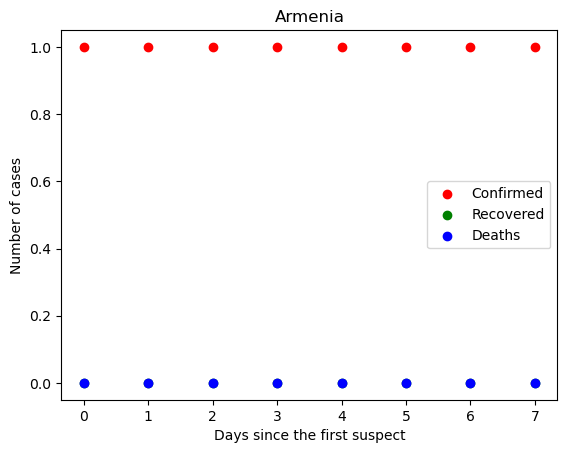

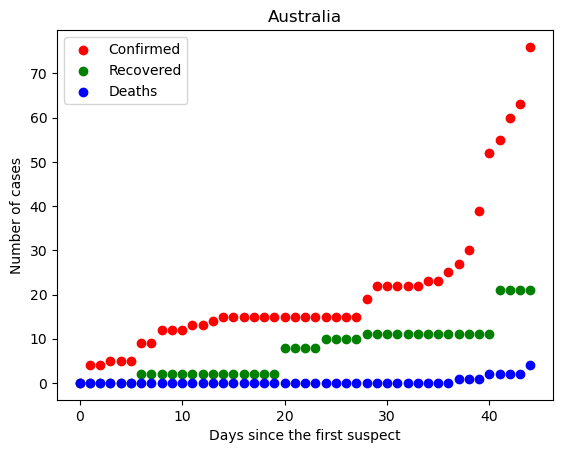

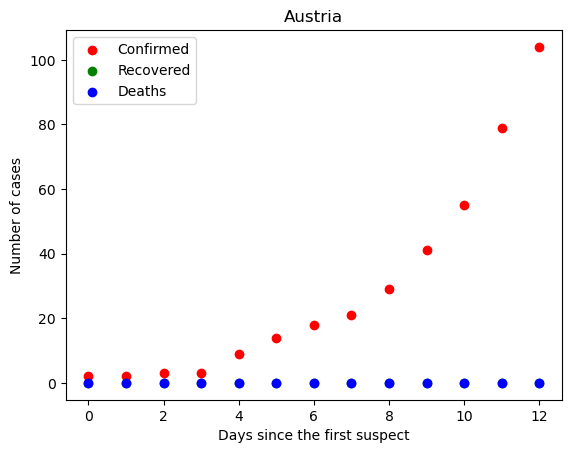

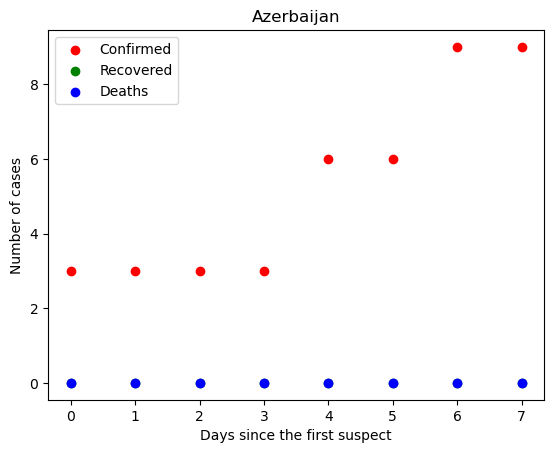

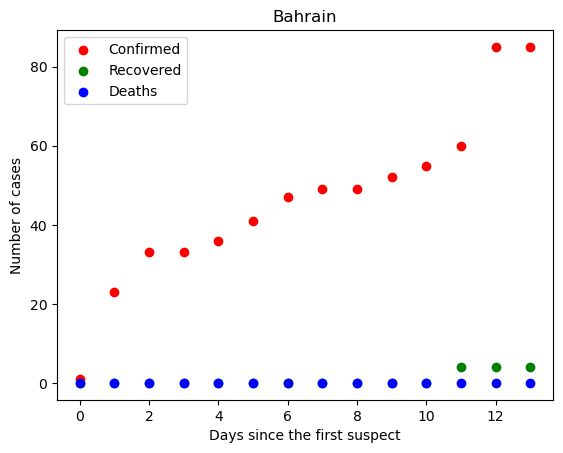

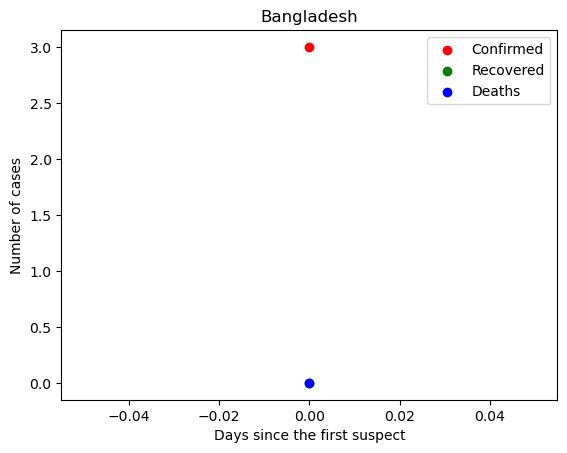

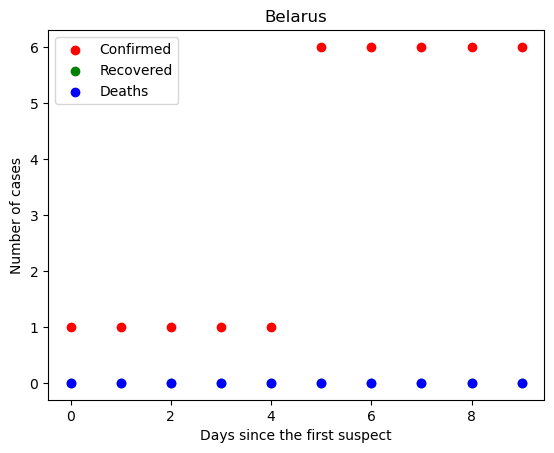

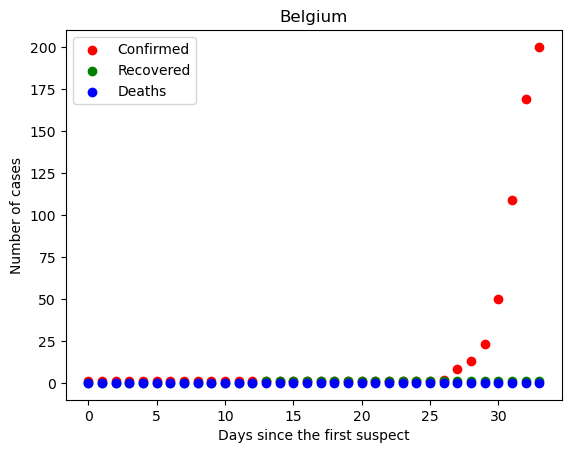

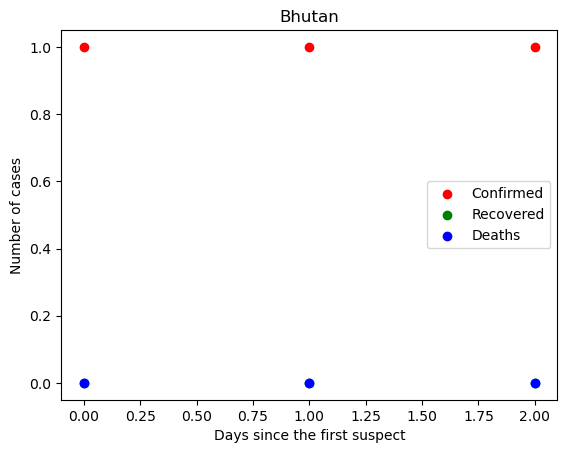

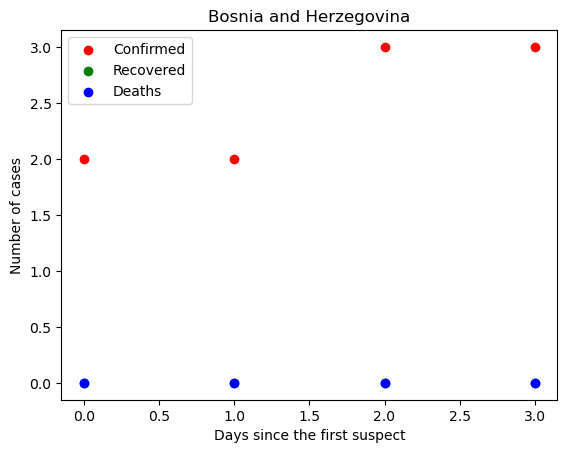

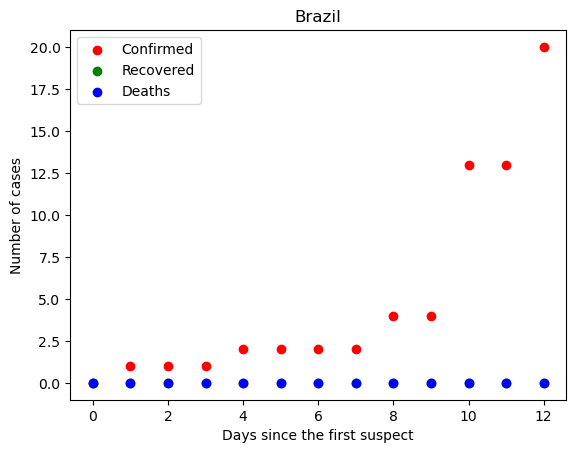

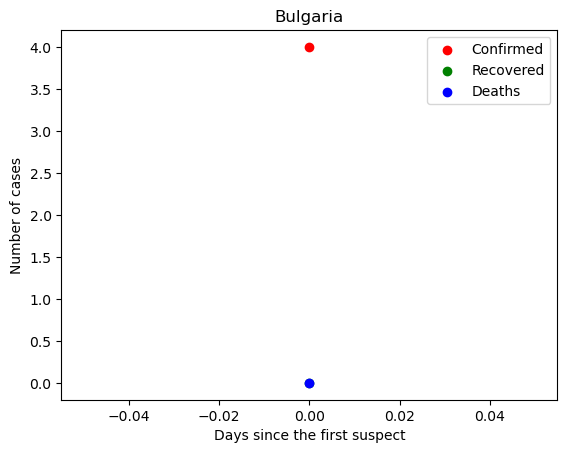

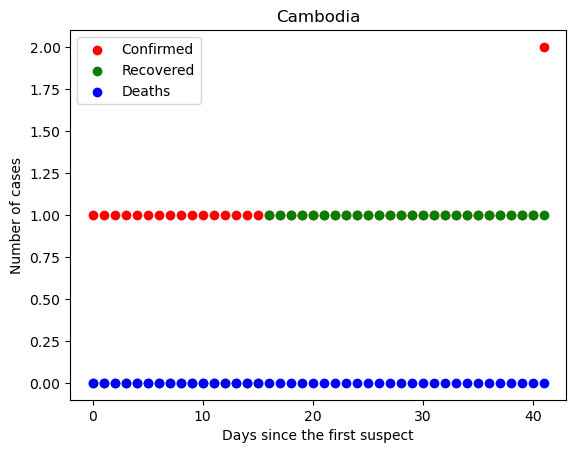

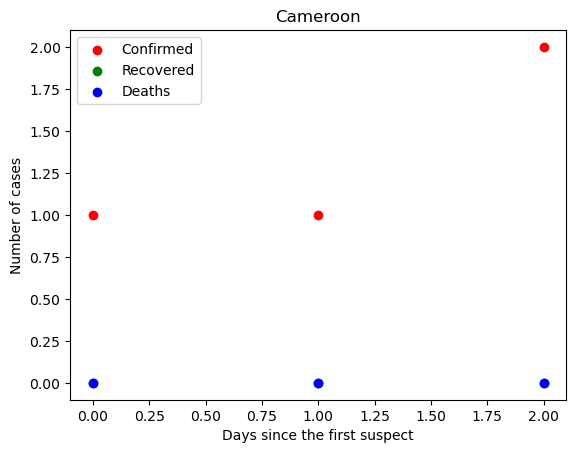

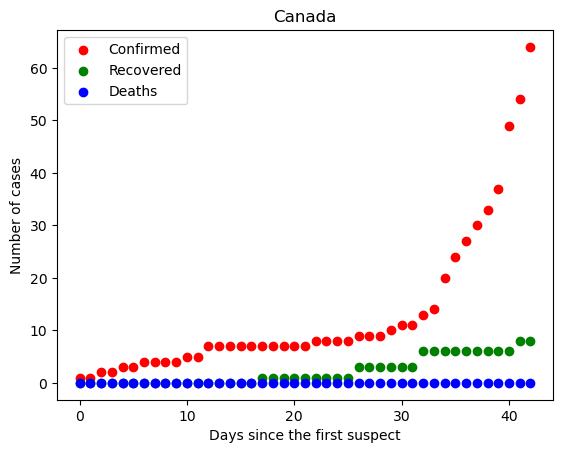

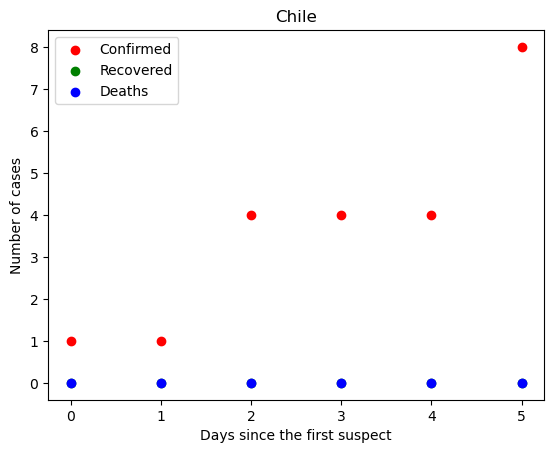

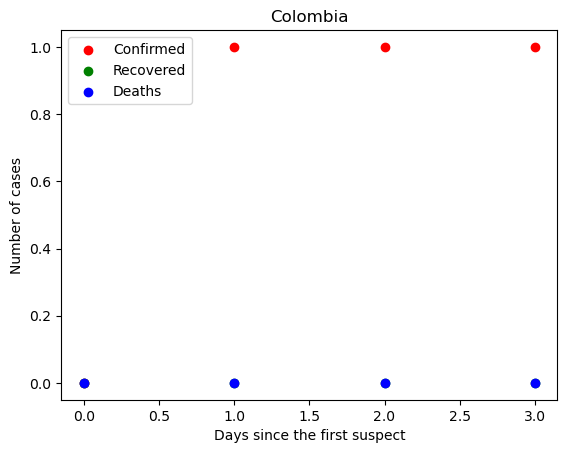

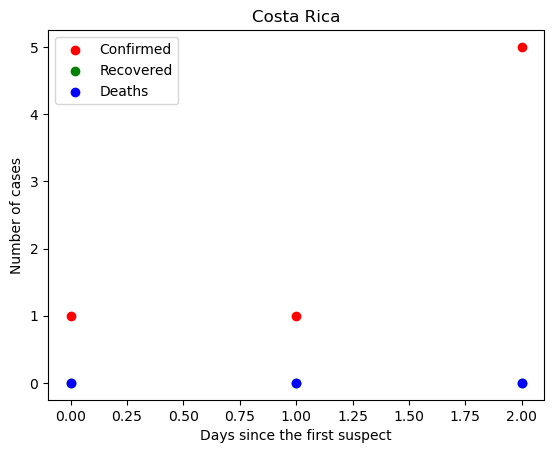

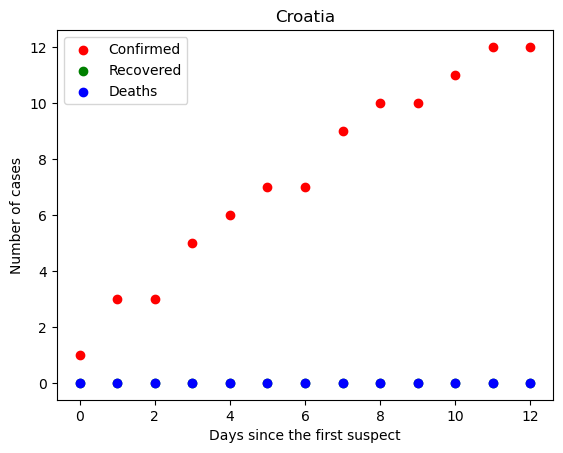

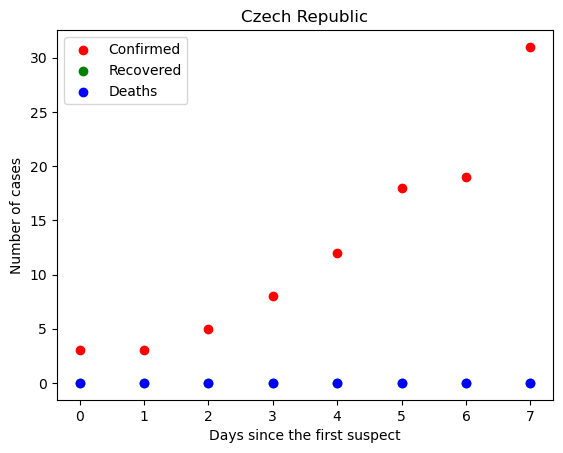

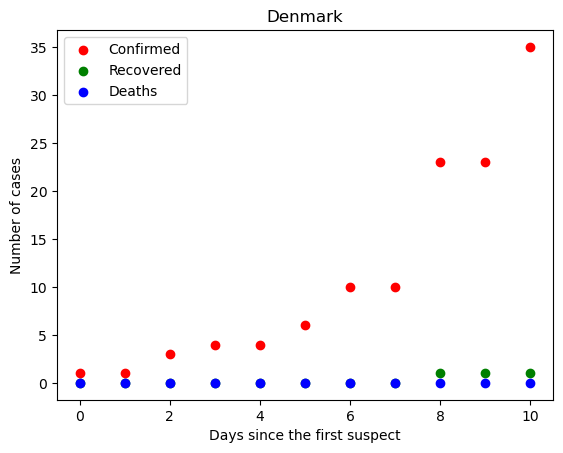

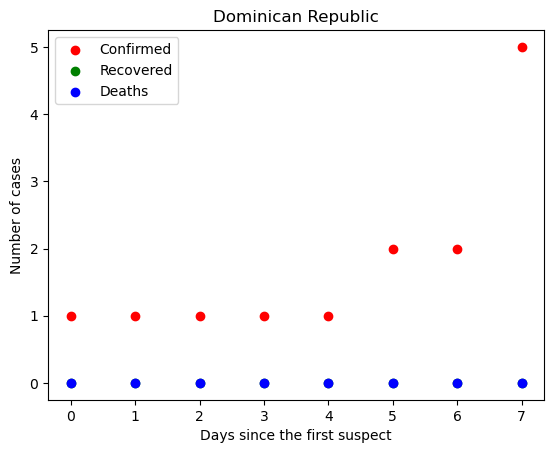

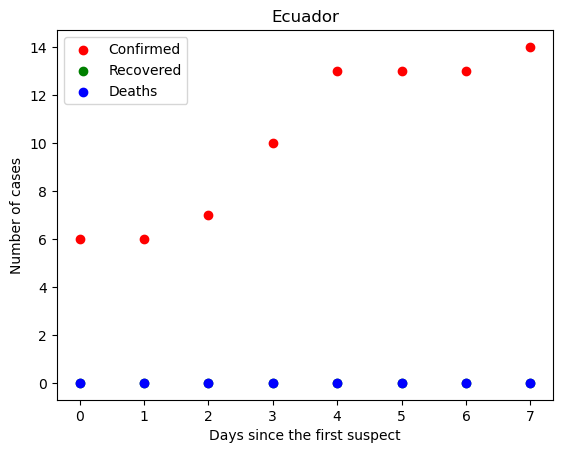

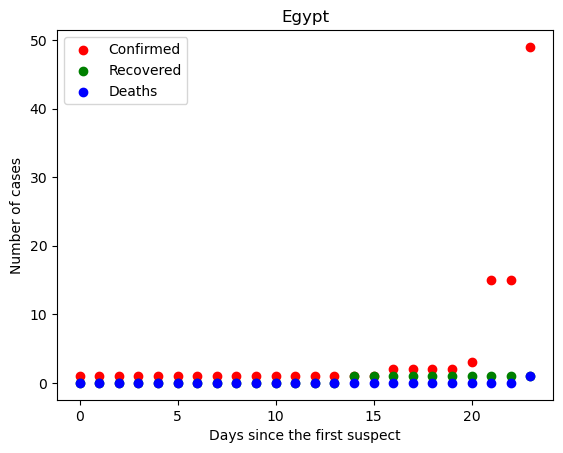

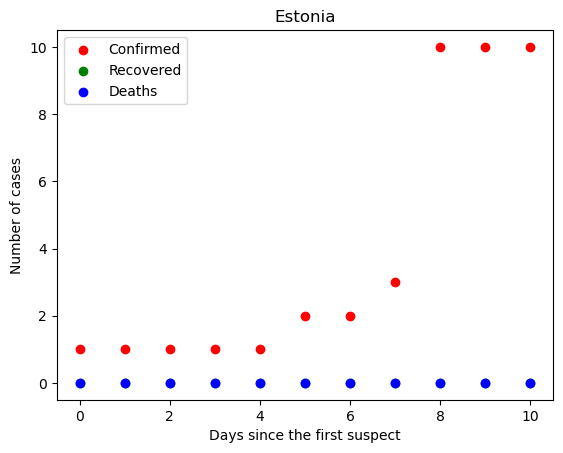

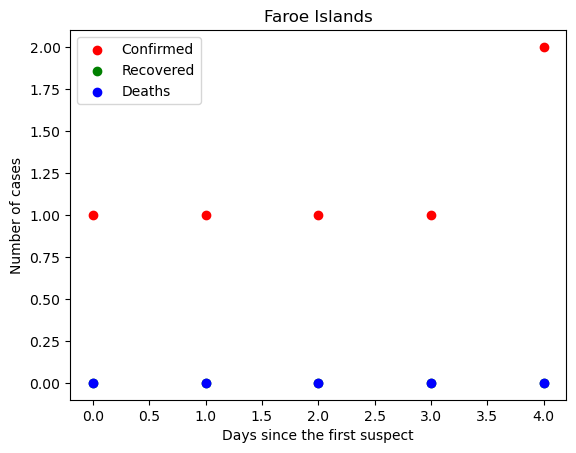

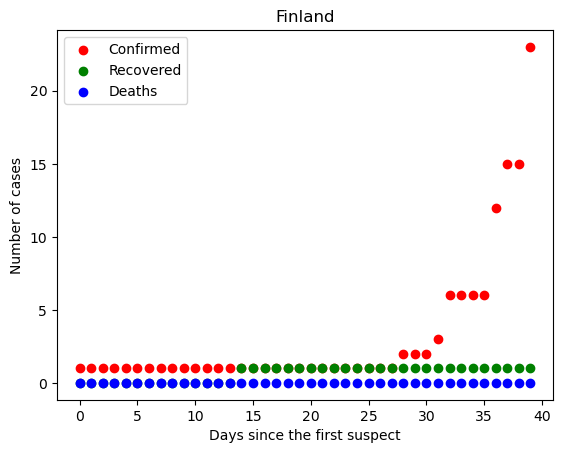

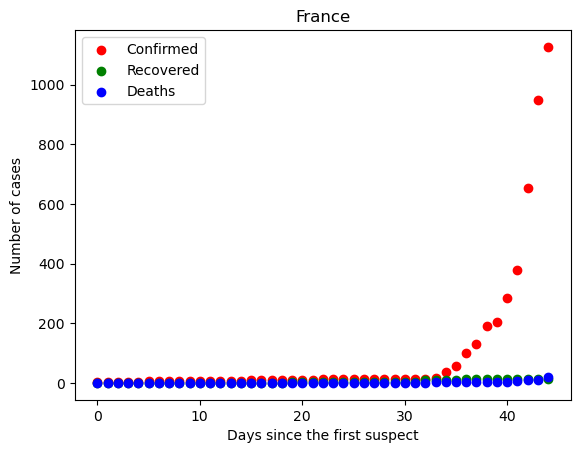

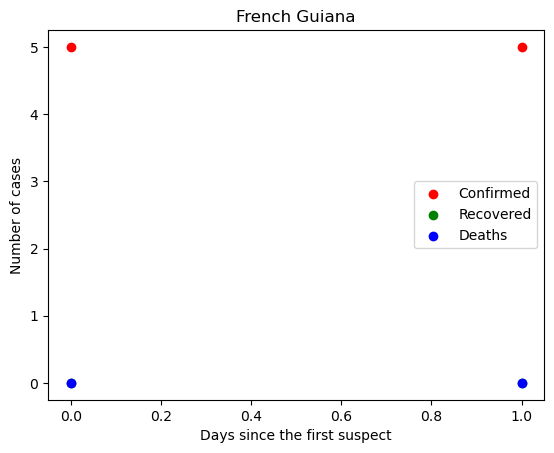

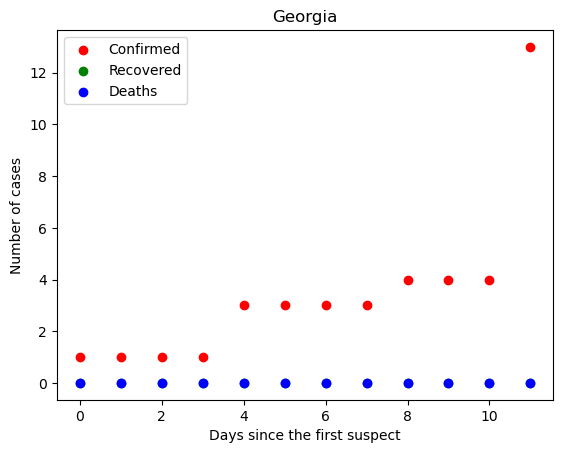

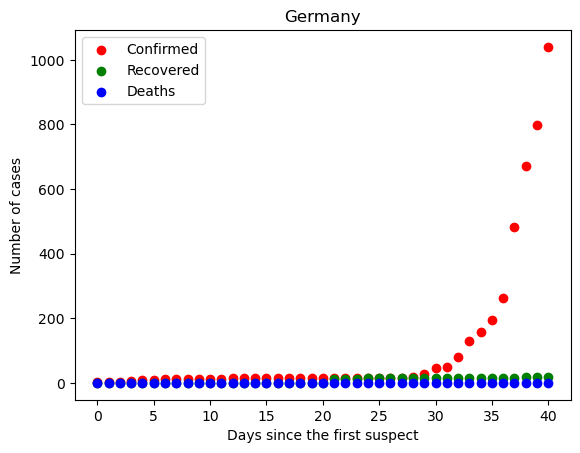

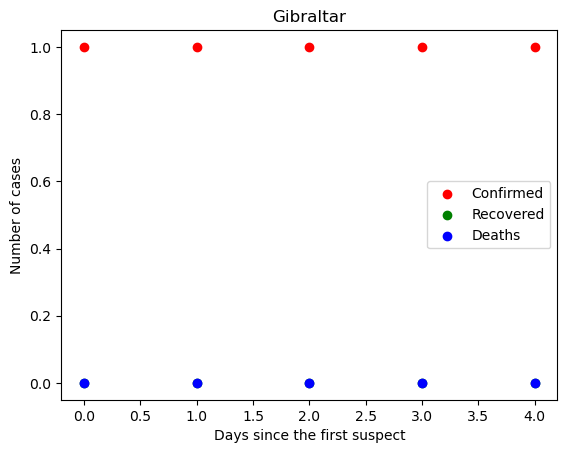

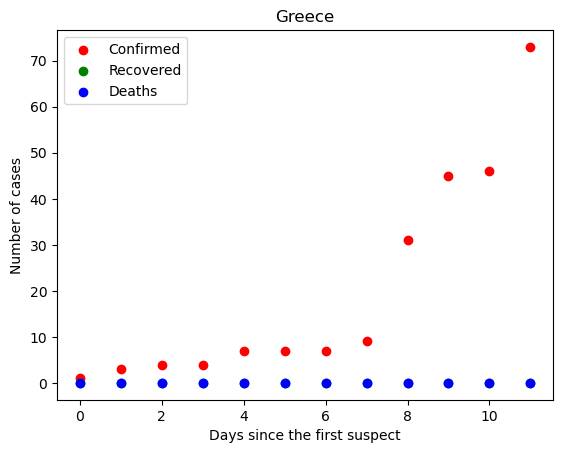

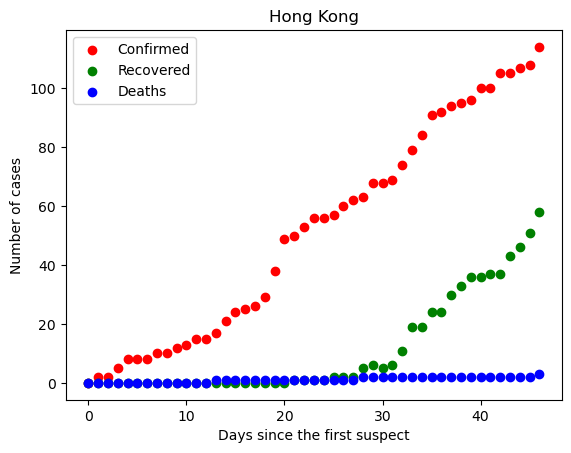

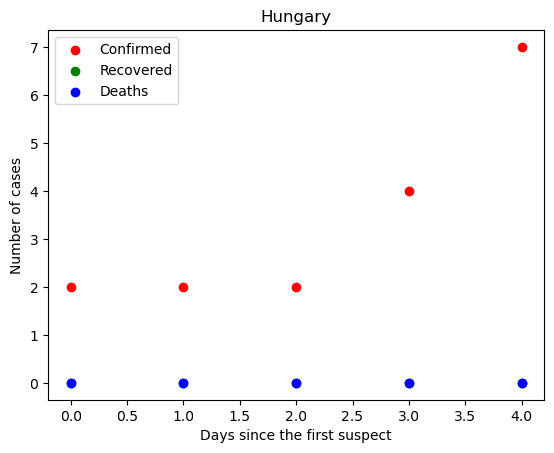

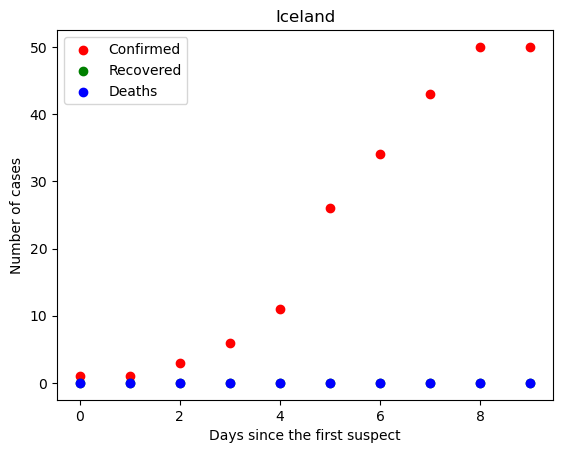

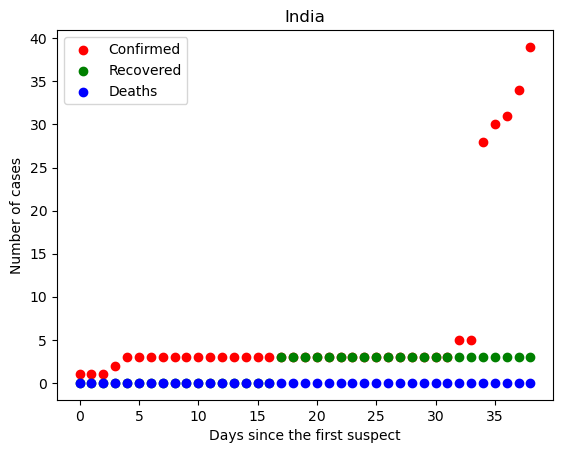

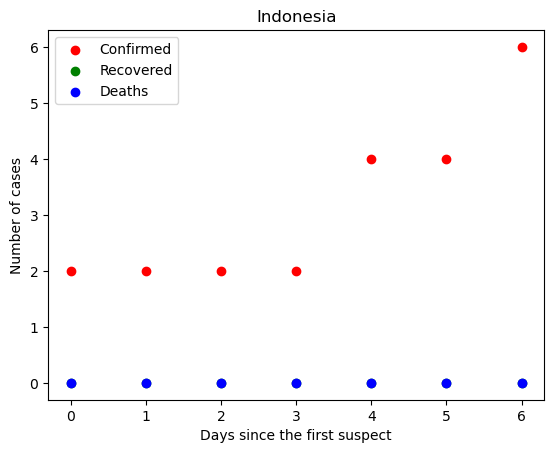

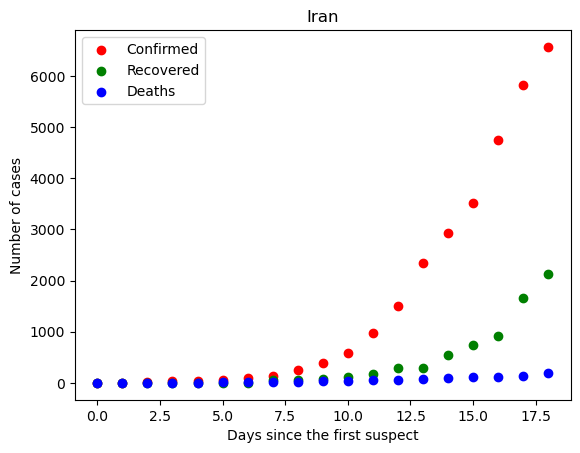

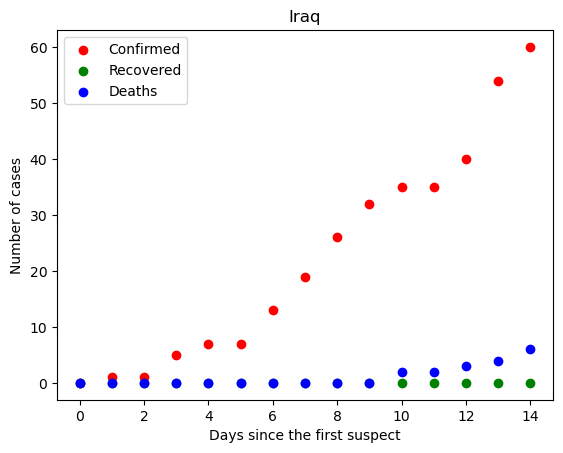

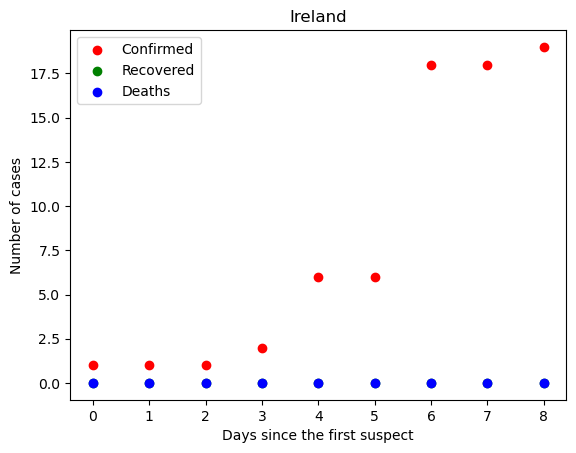

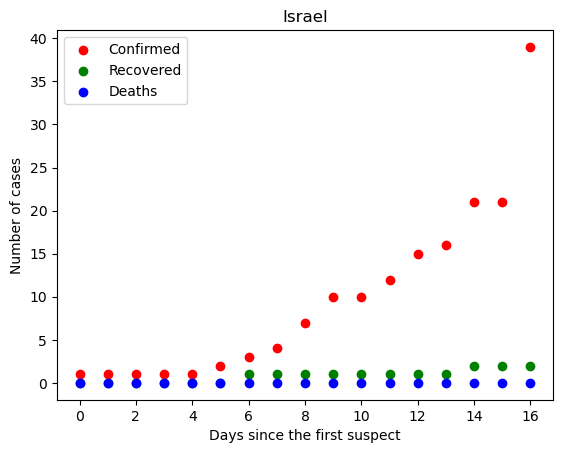

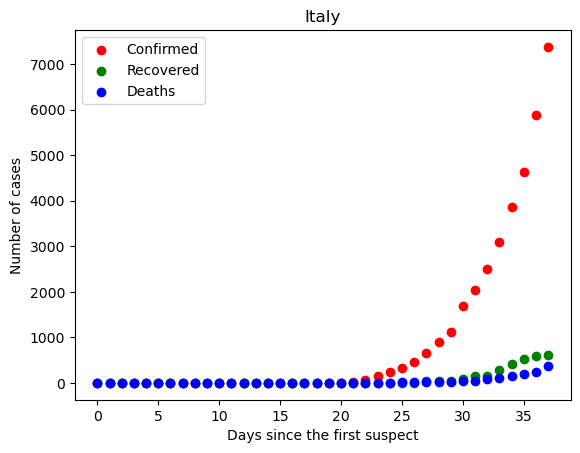

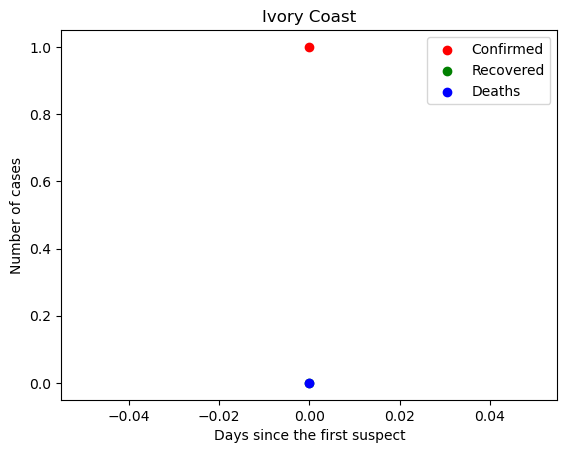

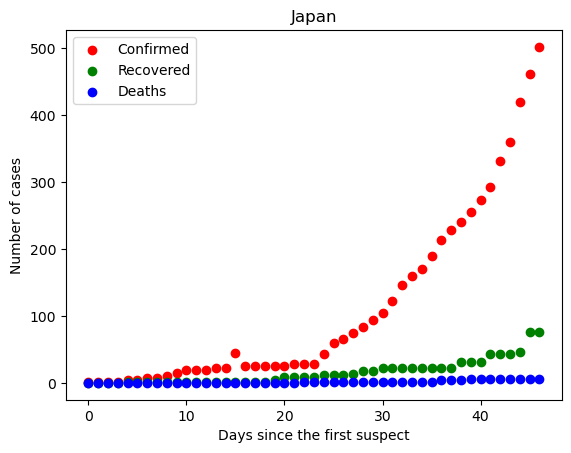

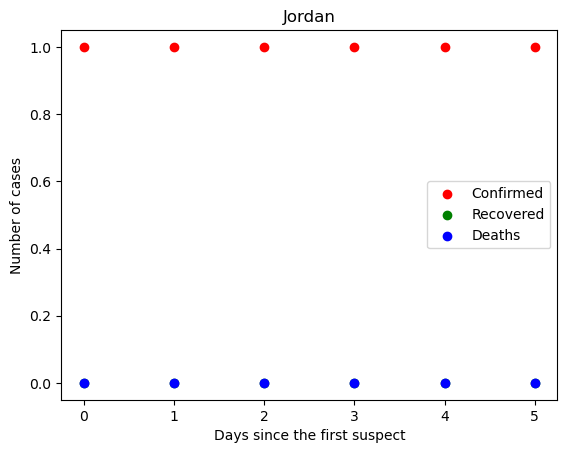

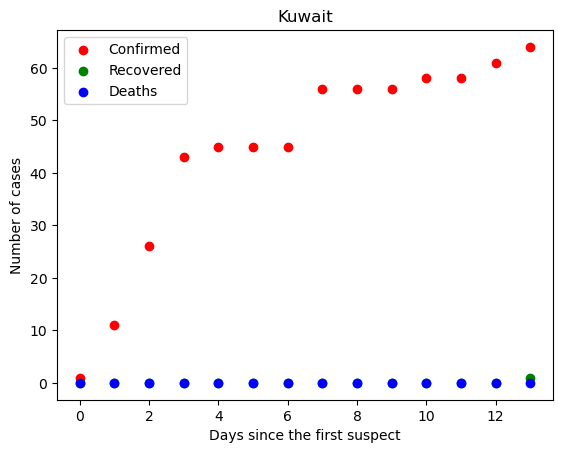

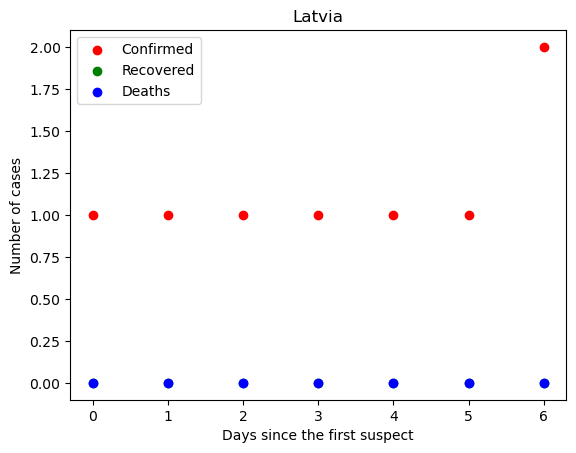

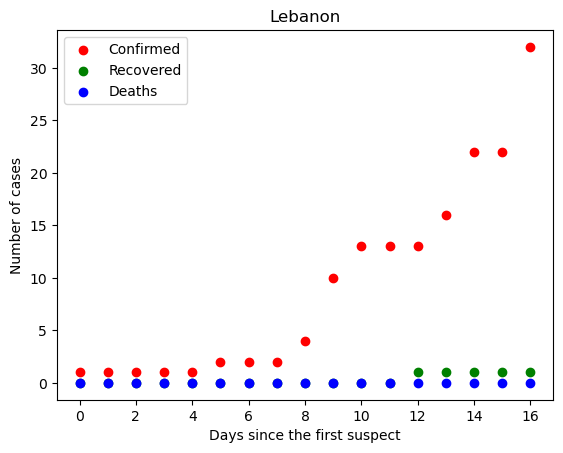

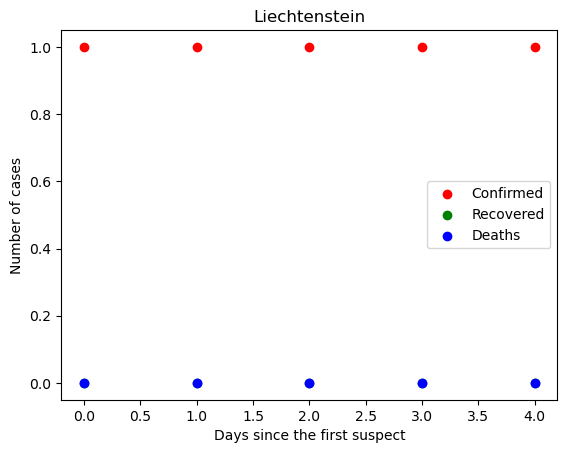

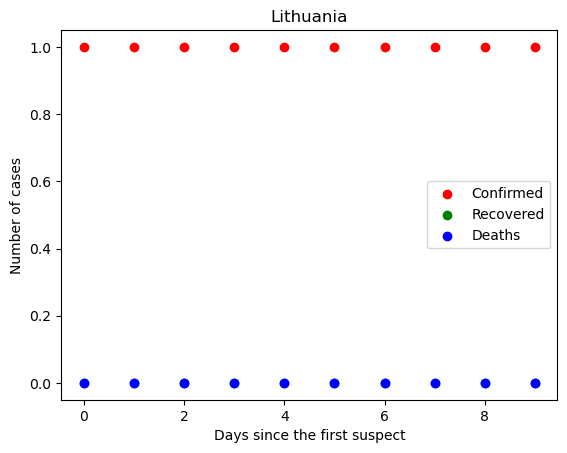

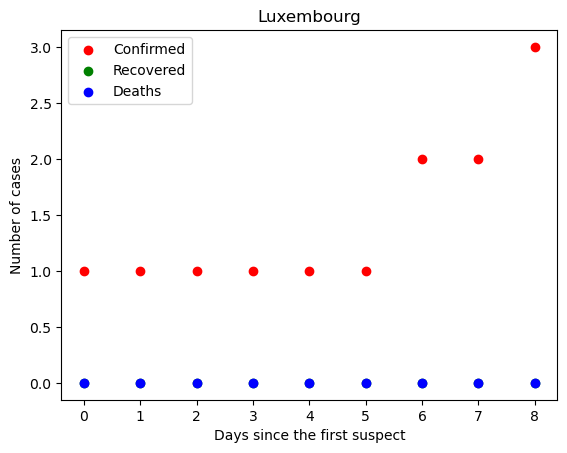

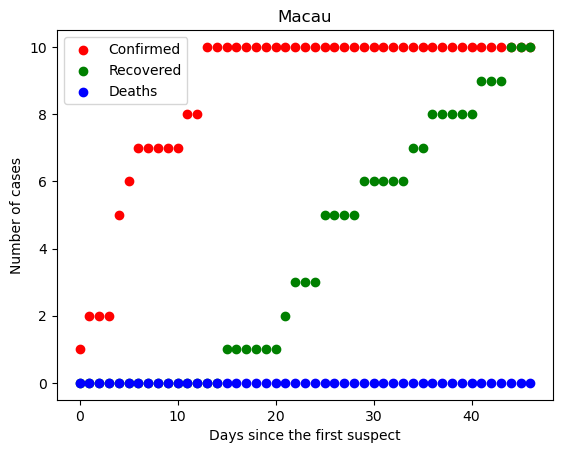

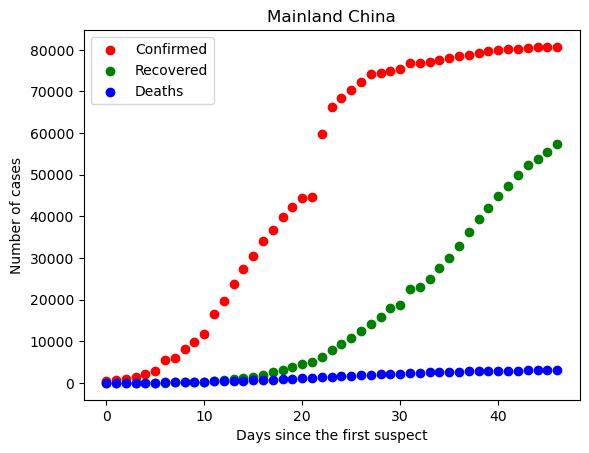

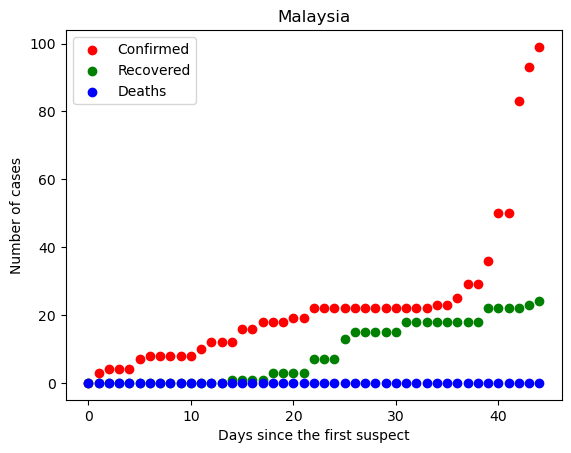

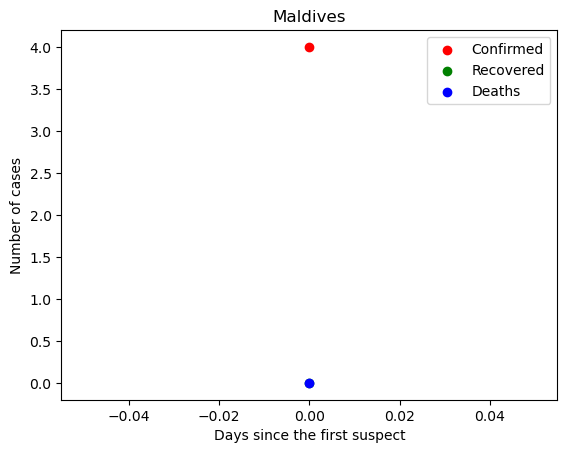

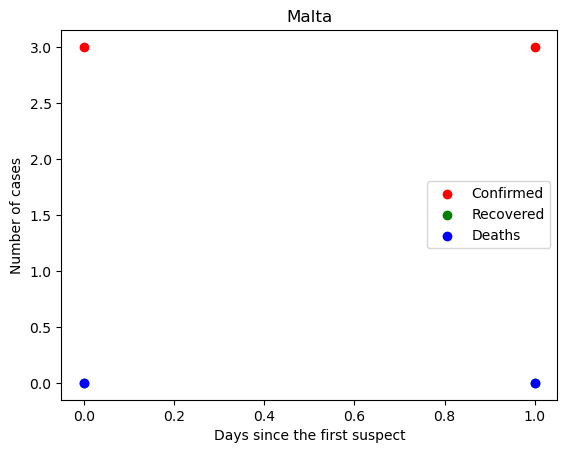

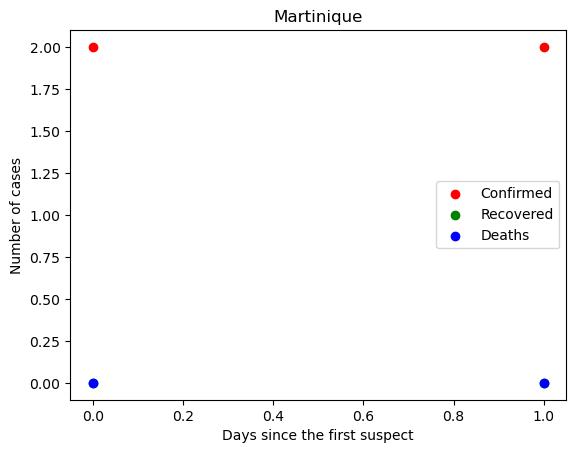

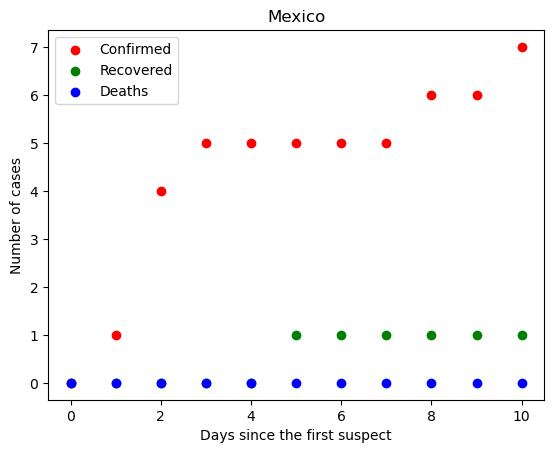

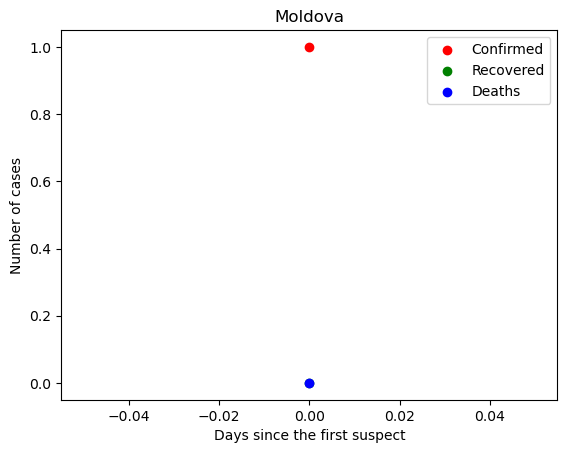

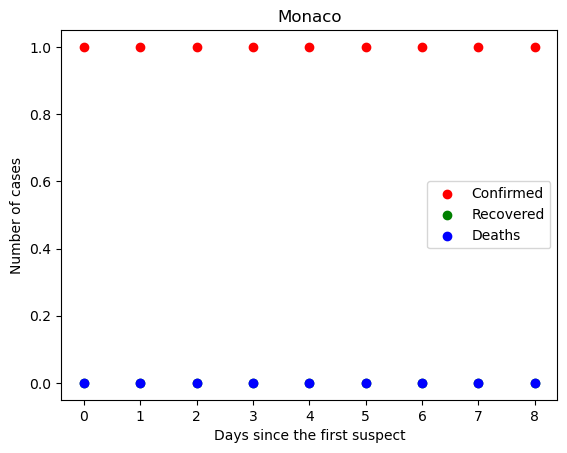

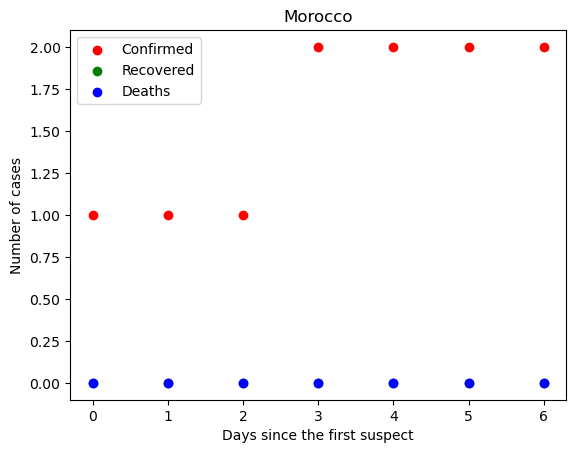

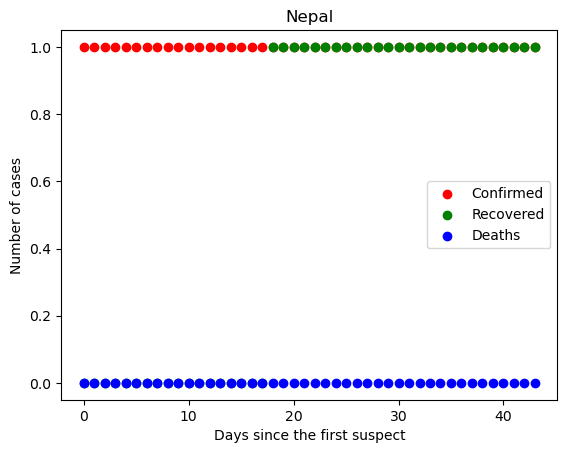

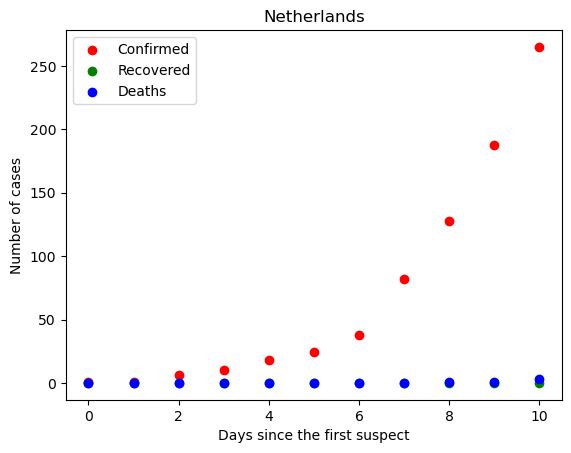

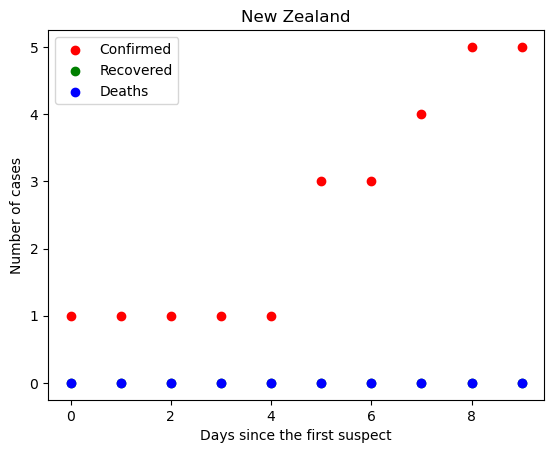

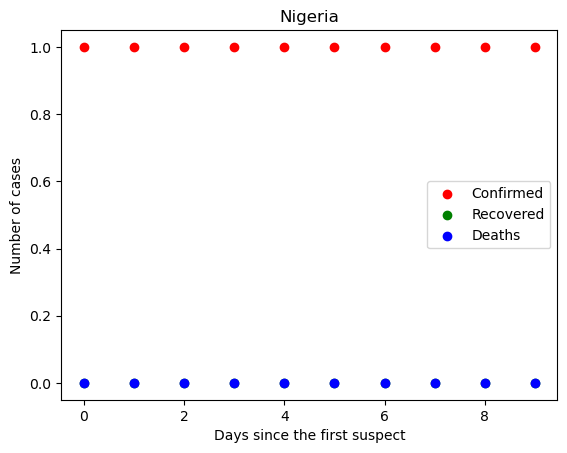

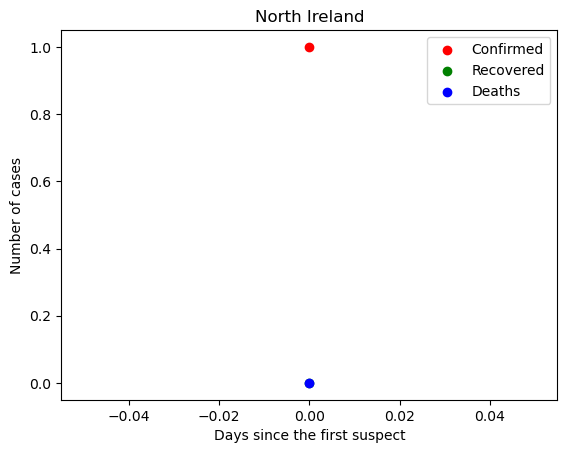

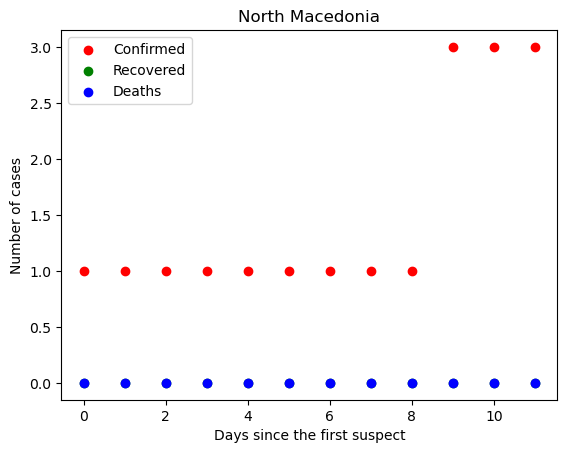

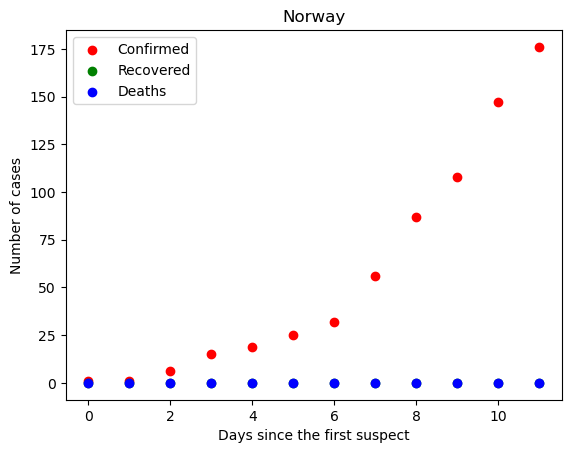

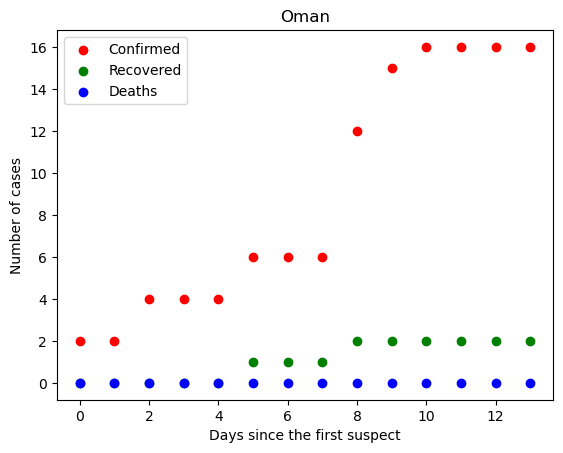

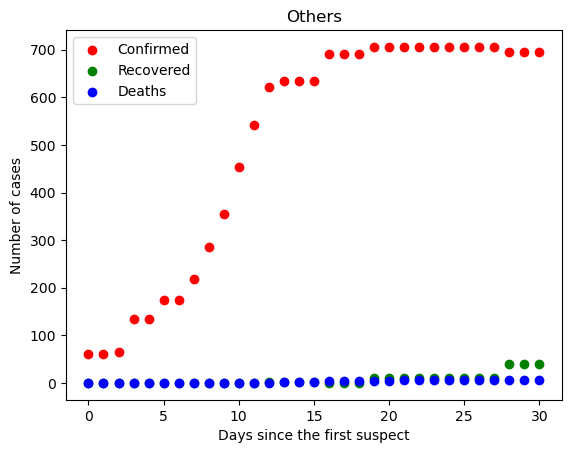

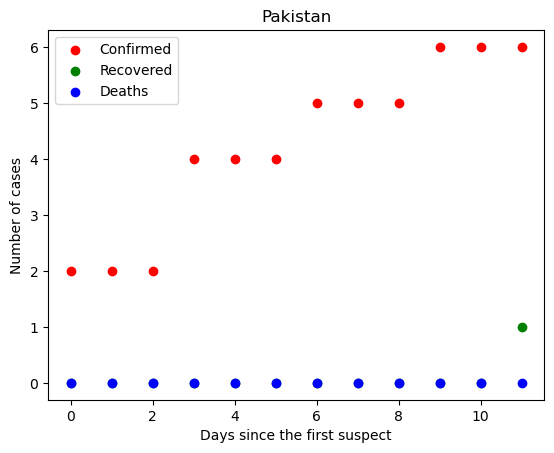

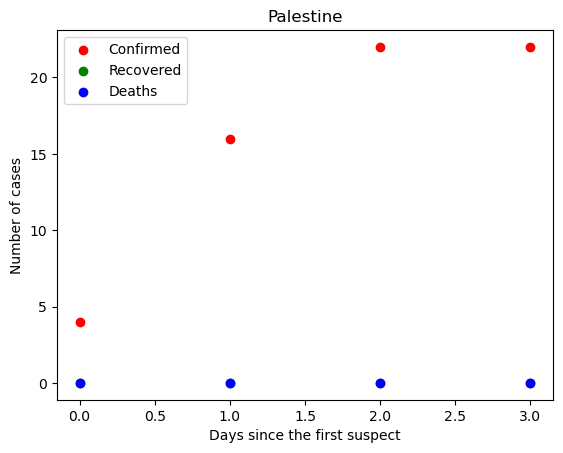

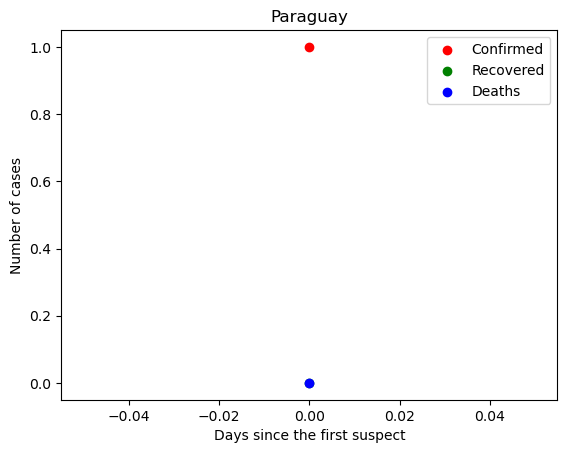

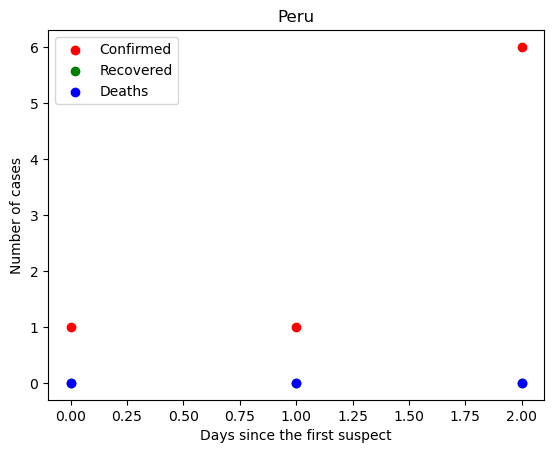

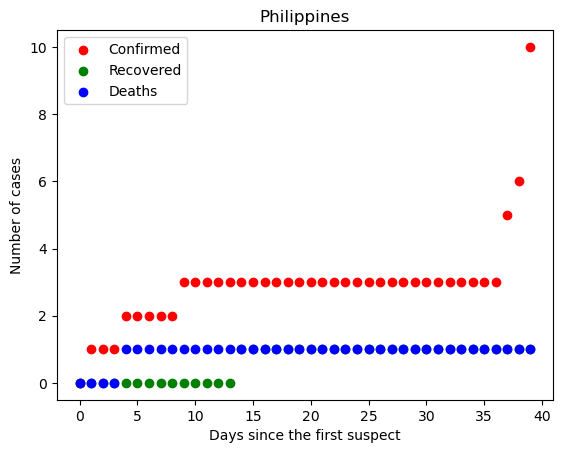

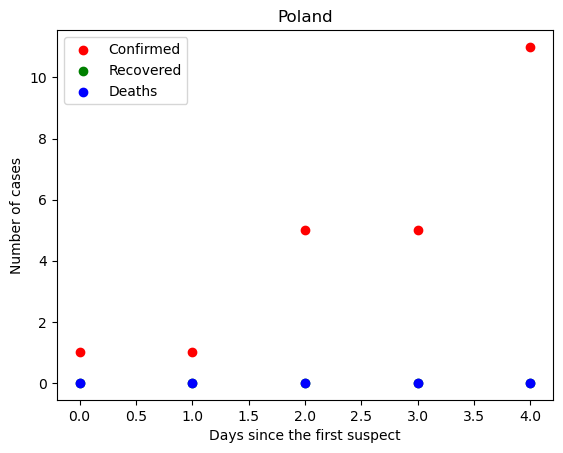

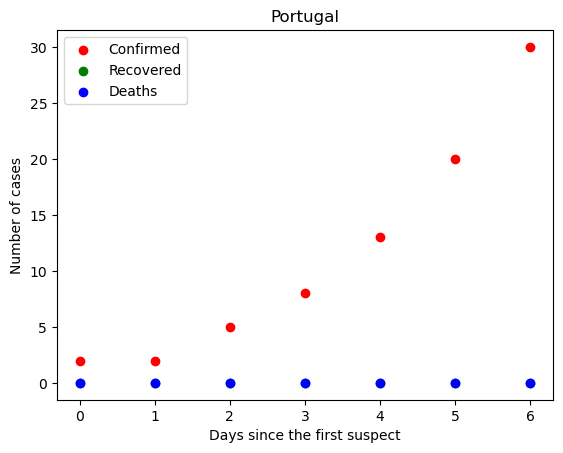

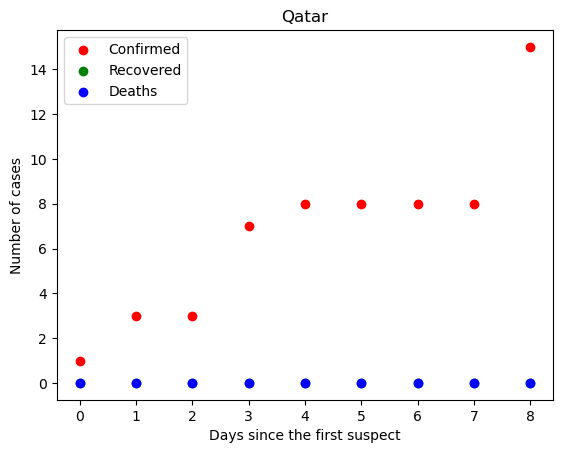

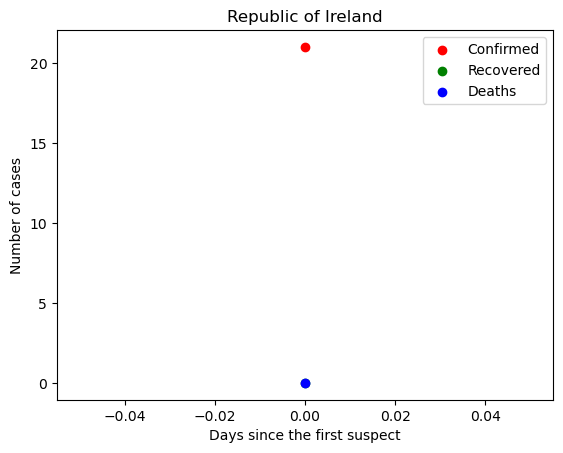

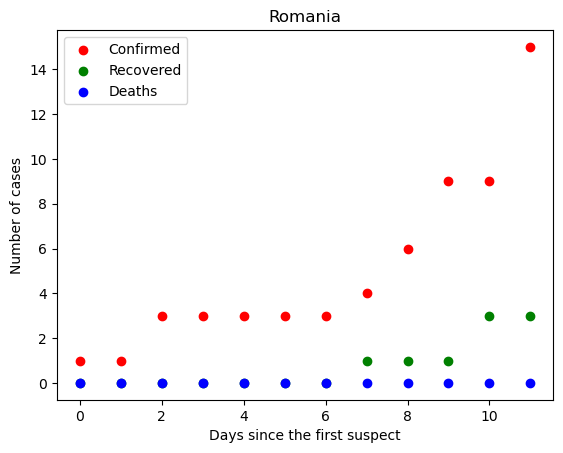

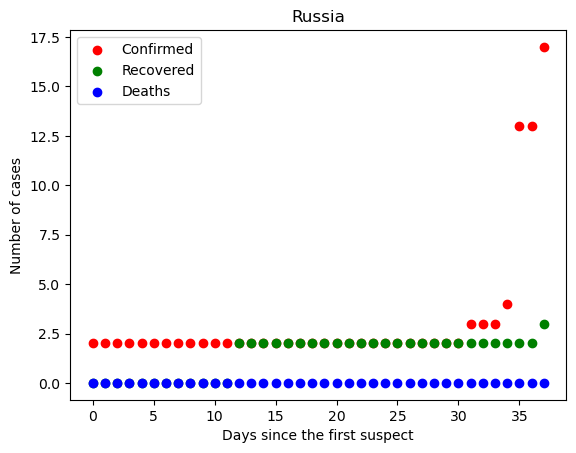

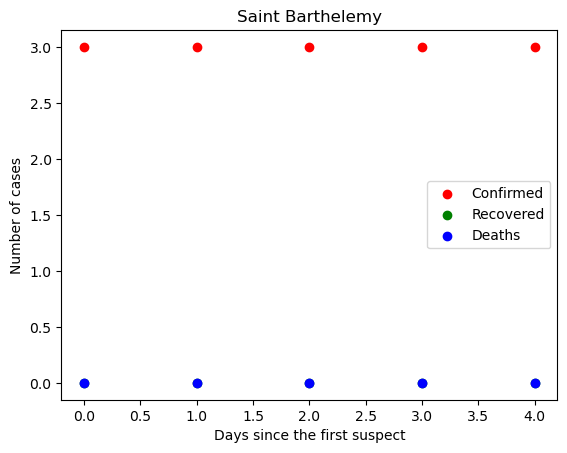

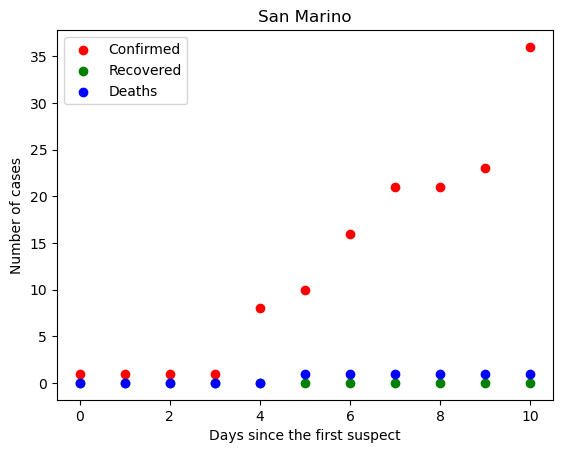

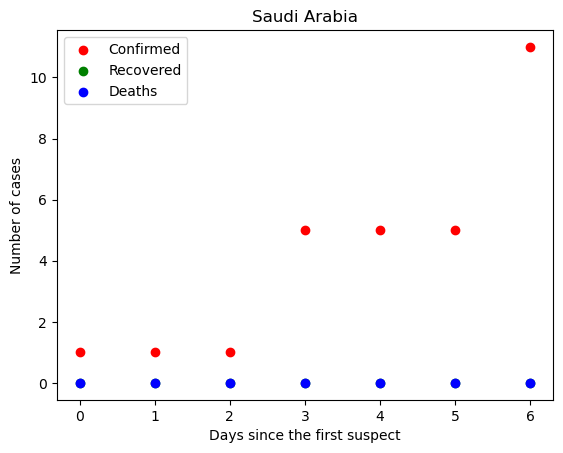

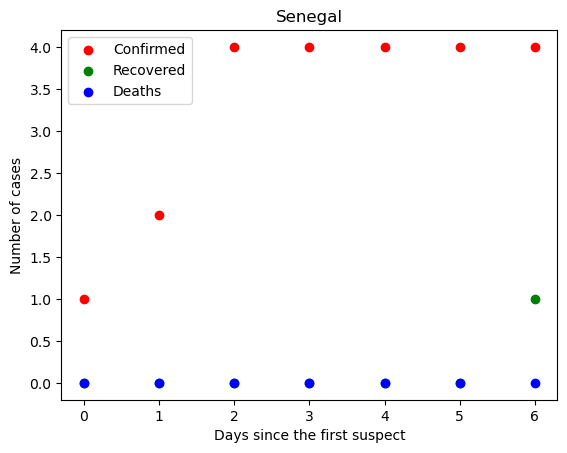

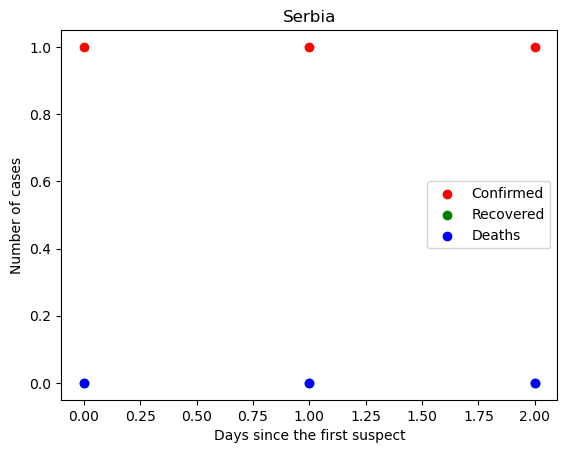

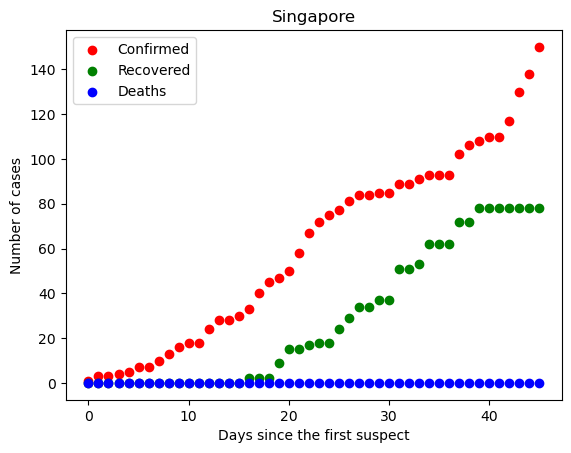

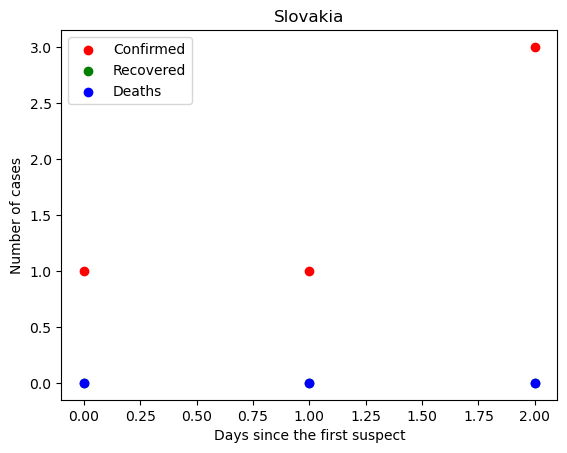

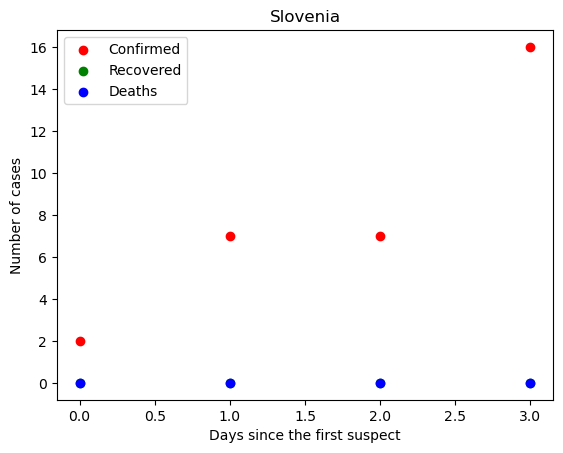

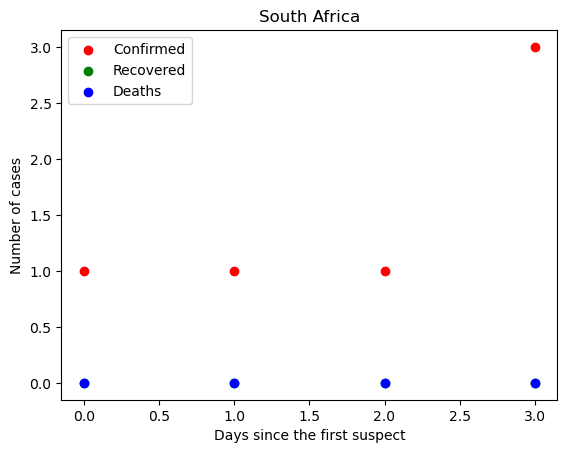

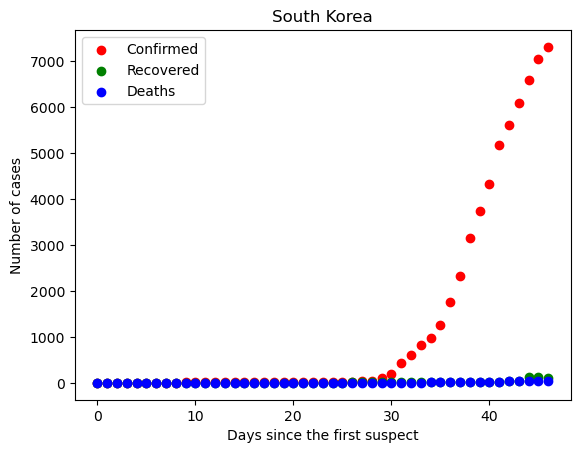

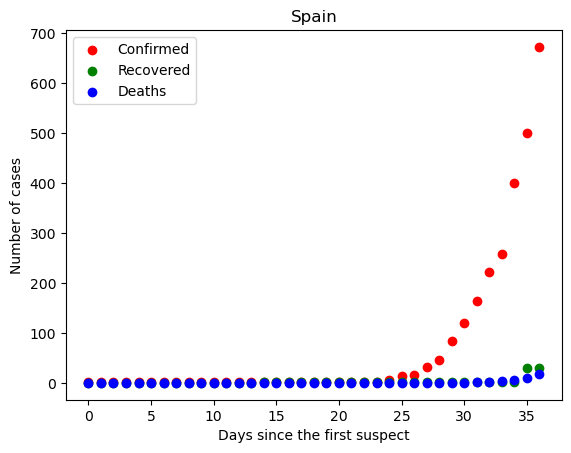

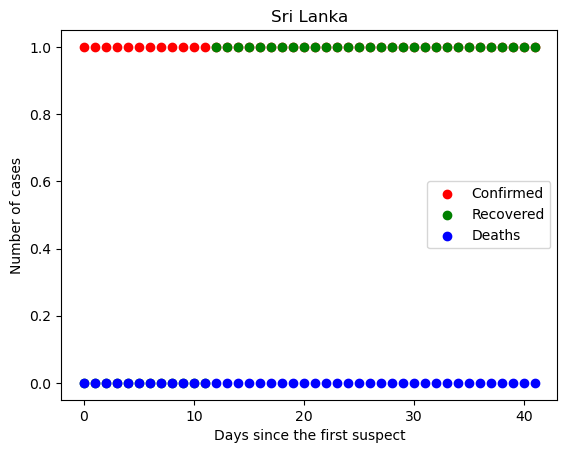

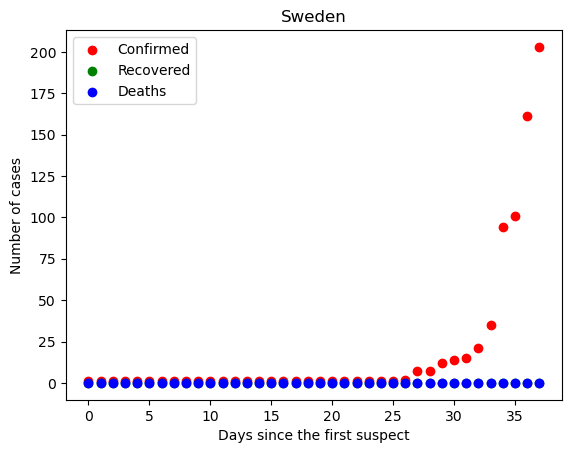

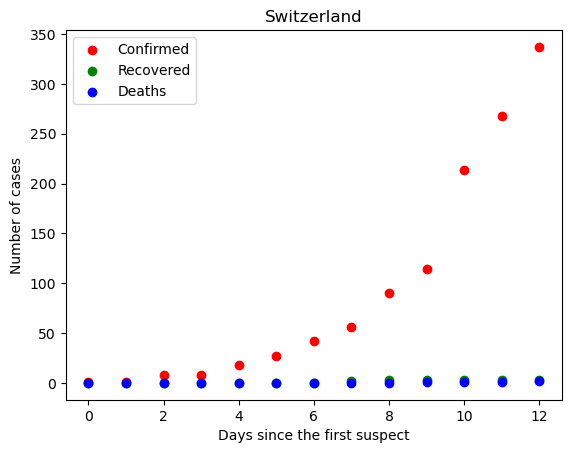

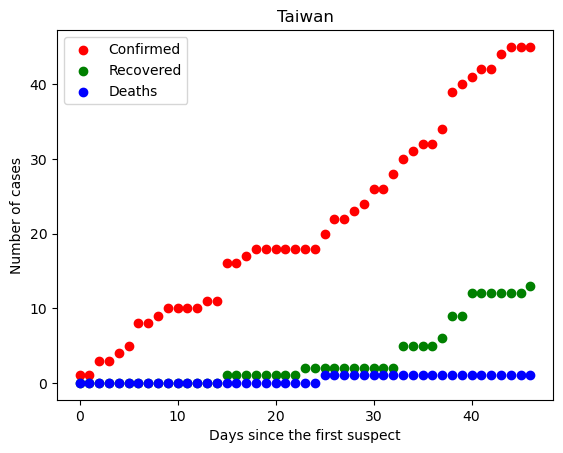

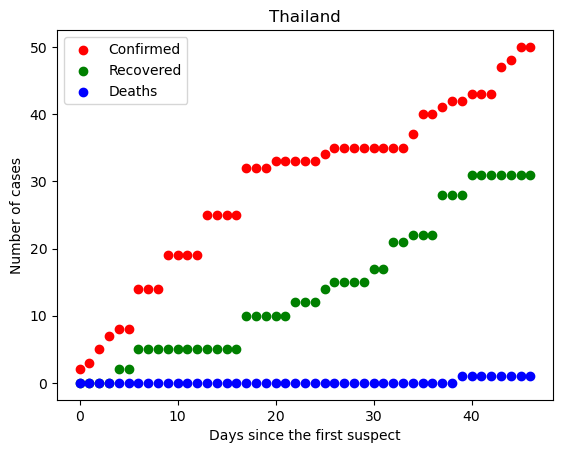

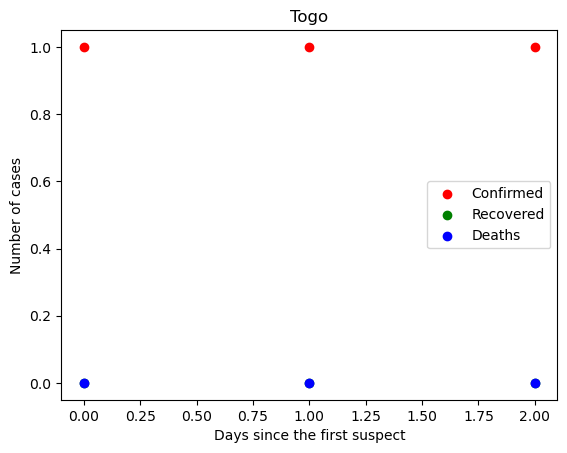

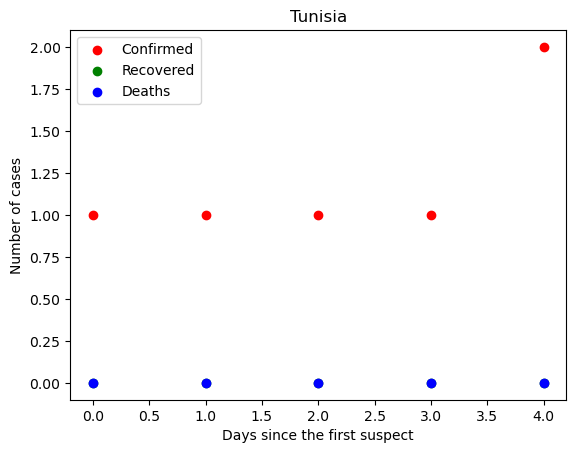

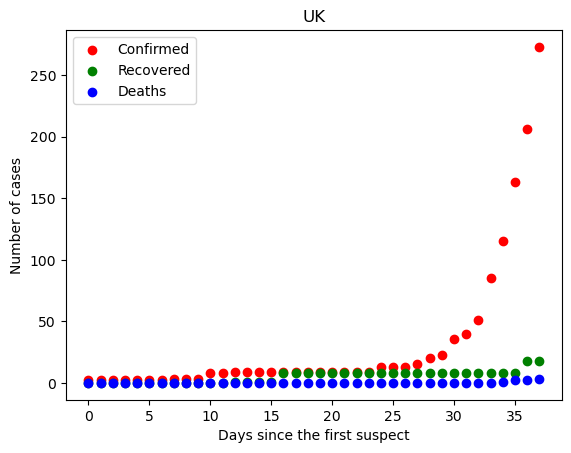

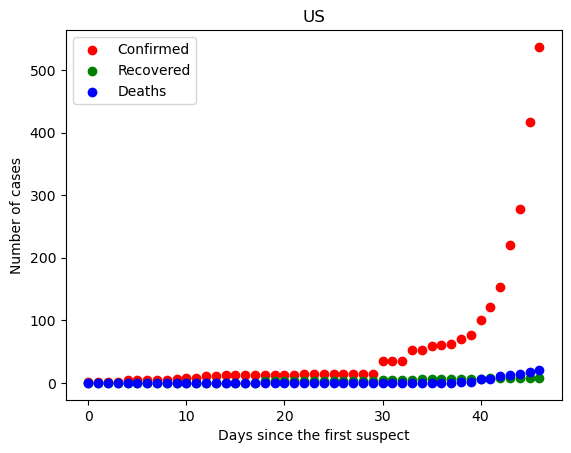

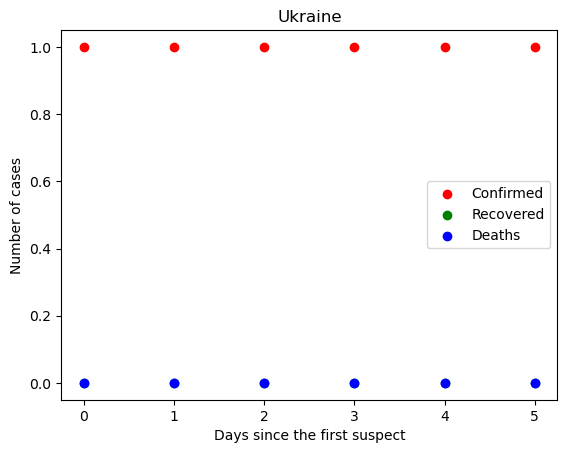

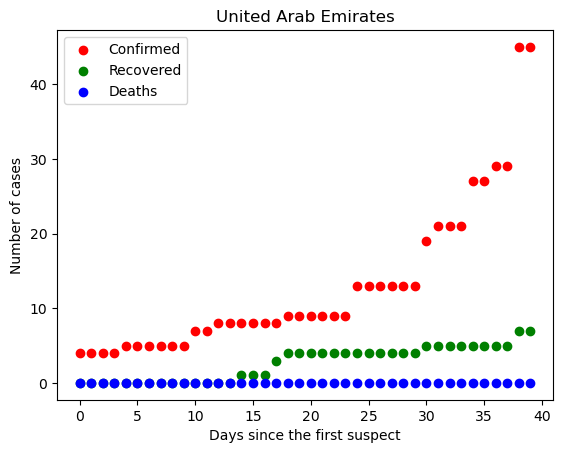

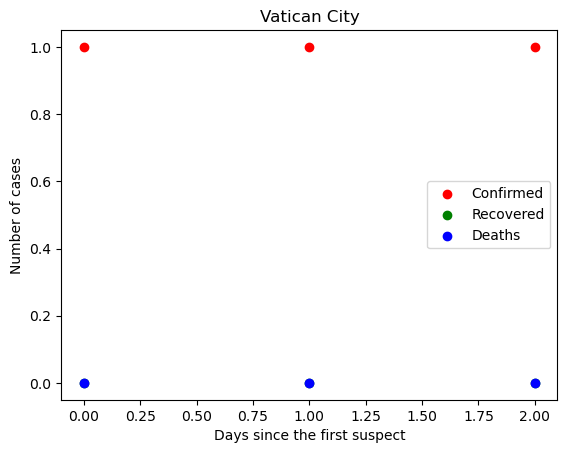

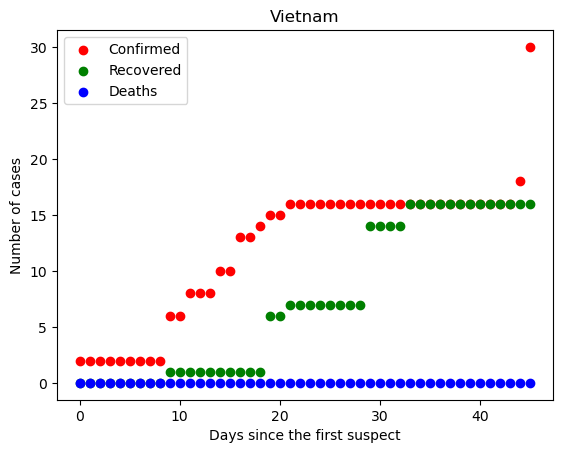

In [11]:
#plot for each individual country

#idx is the loop variable that takes on each value from 0 to the length of countries minus 1
for idx in range(0,len(countries)):   
    
    #filters the DataFrame df3 to select rows where the 'Country' column matches the current country in the loop
    #reset the index of the resulting DataFrame C
    C = df3[df3['Country']==countries[idx]].reset_index()  
    
    #create scatter plots for the 'Confirmed', 'Recovered', and 'Deaths' columns
    #np.arange(0,len(C)) creates an array of numbers from 0 to the length of C minus 1 for the x-axis
    plt.scatter(np.arange(0, len(C)), C['Confirmed'], color='red', label='Confirmed')
    plt.scatter(np.arange(0, len(C)), C['Recovered'], color='green', label='Recovered')
    plt.scatter(np.arange(0, len(C)), C['Deaths'], color='blue', label='Deaths')
    
    #title of the plot
    plt.title(countries[idx])
    
    #x axis title
    plt.xlabel('Days since the first suspect')
    
    #y axis title
    plt.ylabel('Number of cases')
    
    plt.legend()
    plt.show()

In [12]:
#grouping all the countries
df4 = df3.groupby(['Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

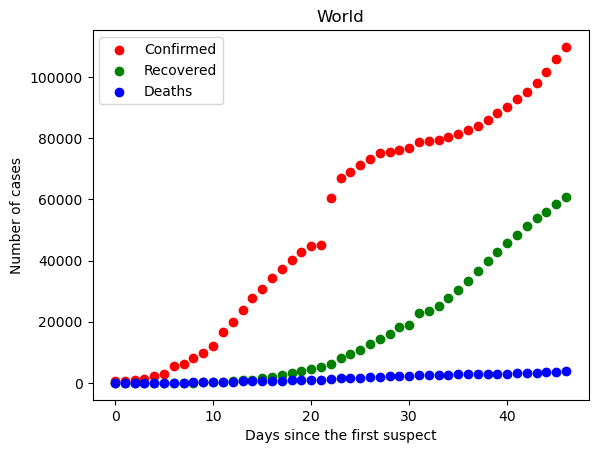

In [13]:
#plot for entire world

C = df4
plt.scatter(np.arange(0, len(C)), C['Confirmed'], color='red', label='Confirmed')
plt.scatter(np.arange(0, len(C)), C['Recovered'], color='green', label='Recovered')
plt.scatter(np.arange(0, len(C)), C['Deaths'], color='blue', label='Deaths')

plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()